In [ ]:
install.packages("mlbench" , repos = "http://cran.us.r-project.org")
install.packages("DataExplorer" , repos = "http://cran.us.r-project.org")
install.packages("corrplot", repos = "http://cran.us.r-project.org")
install.packages("e1071", repos = "http://cran.us.r-project.org")
install.packages("usdm", repos = "http://cran.us.r-project.org")
install.packages("moments", repos = "http://cran.us.r-project.org")
install.packages("pryr", repos = "http://cran.us.r-project.org")
library(tidyverse)
library(ggplot2)
library(moments)
library(mlbench)
library(DataExplorer)
library(corrplot)
library(e1071)
library(usdm)
library(pryr)

In [1]:
BostonURL <- "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
Boston <- read.csv(url(BostonURL), sep = "", header = FALSE)

In [2]:
colnames(Boston) <- c('Crime', 'LrgLots', 'IndAcr', 'River', 'NOX', 'Rms', 'OwnOcc', 'DistWork', 'HiwayAcc', 'PropTax', 'EdRat', 'Min', 'LowStatus', 'MedVal')

In [3]:
BostonNum <- Boston
BostonNum <- subset(BostonNum, select = c('Crime', 'LrgLots', 'IndAcr', 'NOX', 'Rms', 'OwnOcc', 'DistWork', 'PropTax', 'EdRat', 'Min', 'LowStatus', 'MedVal'))

In [4]:
Outliers <- function(dt, var) {
  var_name <- eval(substitute(var), eval(dt))
  na1 <- sum(is.na(var_name))
  m1 <- mean(var_name, na.rm = TRUE)
  par(mfrow = c(1, 4))
  boxplot(var_name, main = 'Original Data with Outliers')
  hist(var_name, main = 'Original Data with Outliers', xlab = NA, ylab = NA)
  outlier <- boxplot.stats(var_name)$out
  mo <- mean(outlier)
  var_name <- ifelse(var_name %in% outlier, NA, var_name)
  boxplot(var_name, main = 'Original Data without Outliers')
  hist(var_name, main = 'Original Data without Outliers', xlab = NA, ylab = NA)
  title('Checking for Outliers Using Tukey Method', outer = TRUE)
  na2 <- sum(is.na(var_name))
  cat('Outliers Identified:', na2 - na1, "\n")
  cat('Percentage Outliers:', round((na2 - na1) / sum(!is.na(var_name)) * 100, 1), "\n")
}

Outliers Identified: 66 
Percentage Outliers: 15 


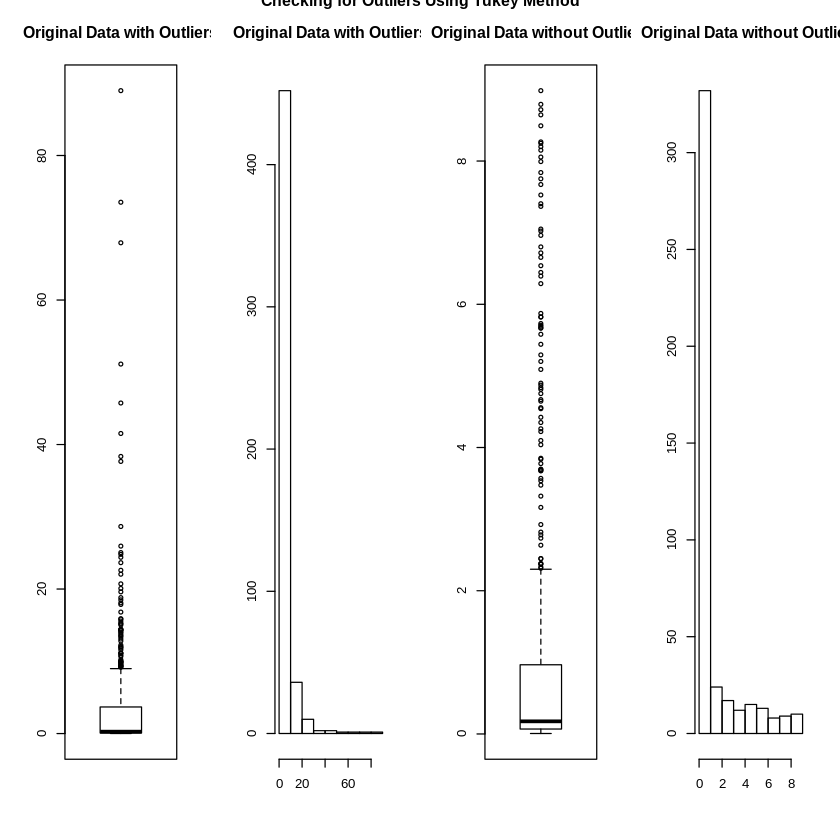

In [5]:
Outliers(BostonNum, Crime)

Outliers Identified: 68 
Percentage Outliers: 15.5 


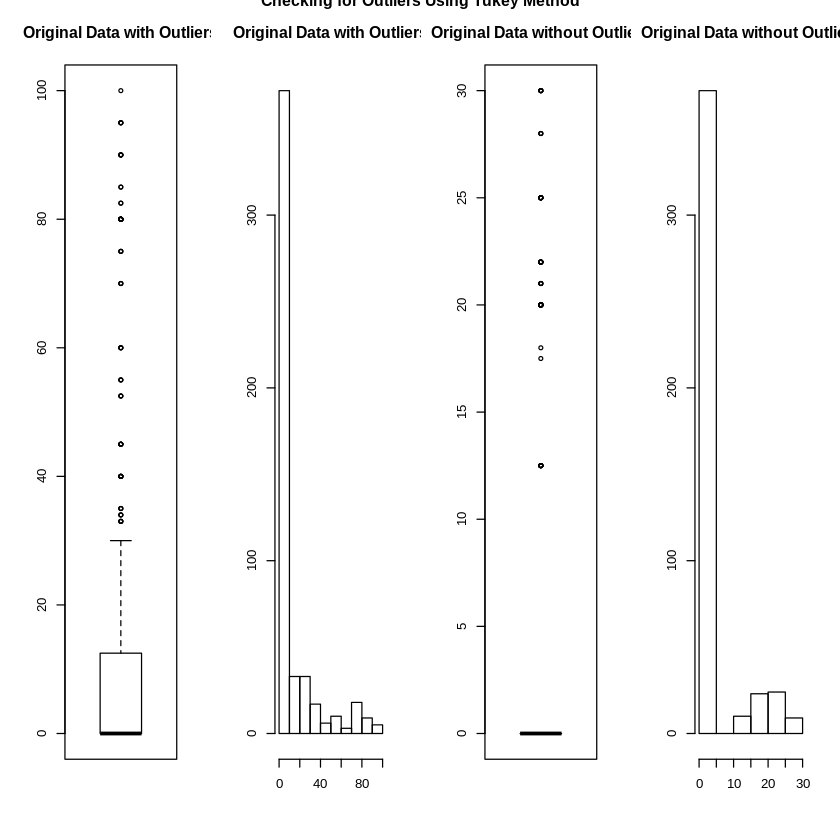

In [6]:
Outliers(BostonNum, LrgLots)